In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
# import statsmodels.api as sm
# from statsmodels.formula.api import sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
df_clean = pd.read_pickle('data/df_clean_pickled.pkl')
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 58975
Data columns (total 49 columns):
LOS                           53104 non-null float64
blood                         53104 non-null uint8
circulatory                   53104 non-null uint8
congenital                    53104 non-null uint8
digestive                     53104 non-null uint8
endocrine                     53104 non-null uint8
genitourinary                 53104 non-null uint8
infectious                    53104 non-null uint8
injury                        53104 non-null uint8
mental                        53104 non-null uint8
misc                          53104 non-null uint8
muscular                      53104 non-null uint8
neoplasms                     53104 non-null uint8
nervous                       53104 non-null uint8
pregnancy                     53104 non-null uint8
prenatal                      53104 non-null uint8
respiratory                   53104 non-null uint8
skin                  

In [3]:
df_clean.isnull().values.sum()

0

In [5]:
# Target Variable (Length-of-Stay)
LOS = df_clean['LOS'].values
# Prediction Features
features = df_clean.drop(columns=['LOS'])

In [6]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 42483 samples.
Testing set has 10621 samples.


In [7]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))
    
#     print(reg_model.coef_)
#     print(reg_model.intercept_)

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.


C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor done.


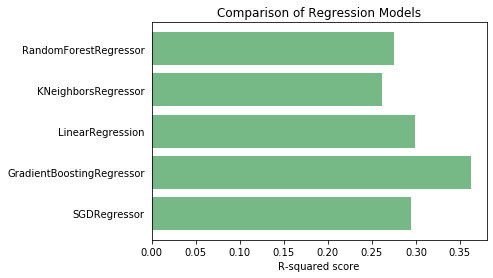

In [8]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('images/compare_models.png', bbox_inches = 'tight')

In [9]:
# GradientBoostingRegressor will be used as the LOS prediction model
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined)) 

R2 score is: 0.362068


In [10]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Set the parameters by cross-validation
#tuned_parameters = [{'n_estimators': [100, 200, 300],
#                     'max_depth' : [2, 3, 4],
#                     'loss': ['ls', 'lad', 'huber']}]
tuned_parameters = [{'n_estimators': [200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad']}]

# create and fit a ridge regression model, testing each alpha
reg_model = GradientBoostingRegressor()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.4073586384057087
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [11]:
#reg_model = GradientBoostingRegressor(n_estimators = 200, max_depth=4, random_state=0)   
#reg_model.fit(X_train, y_train)
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized)) 

Optimized R2 score is: 0.387512


In [12]:
print('Model refinement improved R2 score by {:.4f}'.format(r2_optimized-r2_not_refined))

Model refinement improved R2 score by 0.0254


## Removing 24 less important features (aggreagte 3.6% important )
### Keeping 24 important features (aggreate 96.4 %)

In [13]:
# df_clean_columnsDropped = df_clean

df_clean.drop(columns=['ETH_BLACK/AFRICAN AMERICAN', 'pregnancy','AGE_senior','AGE_young_adult','ADM_NEWBORN','MAR_UNKNOWN (DEFAULT)', \
'INS_Private','ETH_OTHER/UNKNOWN','REL_RELIGIOUS','REL_UNOBTAINABLE','AGE_middle_adult','ETH_HISPANIC/LATINO',  \
'ETH_WHITE','MAR_SINGLE','REL_NOT SPECIFIED','MAR_DIVORCED','ADM_ELECTIVE','MAR_MARRIED','MAR_SEPARATED',   \
'ETH_ASIAN','AGE_newborn','MAR_WIDOWED','INS_Self Pay','MAR_LIFE PARTNER']
, inplace=True)

In [14]:
df_clean.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,respiratory,skin,GENDER,ICU,NICU,ADM_EMERGENCY,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare
count,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,...,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000,53104.000000
mean,10.138174,0.375527,2.319938,0.074646,0.621648,1.185184,0.522503,0.310447,2.360029,0.428179,...,0.690588,0.151250,0.439157,0.829260,0.149217,0.689722,0.022126,0.031881,0.101706,0.457743
std,12.284461,0.653225,2.273787,0.351744,1.116934,1.341736,0.857216,0.669438,2.201613,0.849614,...,1.054394,0.507799,0.496289,0.376286,0.356305,0.462612,0.147096,0.175684,0.302264,0.498216
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.866667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.565972,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11.711632,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.000000,...,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Target Variable (Length-of-Stay)
LOS = df_clean['LOS'].values
# Prediction Features
features = df_clean.drop(columns=['LOS'])

In [16]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 42483 samples.
Testing set has 10621 samples.


In [17]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.


C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor done.


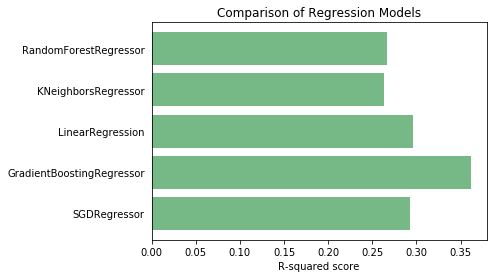

In [18]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('images/compare_models.png', bbox_inches = 'tight')

In [19]:
# GradientBoostingRegressor will be used as the LOS prediction model
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined)) 

R2 score is: 0.361388


In [20]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Set the parameters by cross-validation
#tuned_parameters = [{'n_estimators': [100, 200, 300],
#                     'max_depth' : [2, 3, 4],
#                     'loss': ['ls', 'lad', 'huber']}]
tuned_parameters = [{'n_estimators': [200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad']}]

# create and fit a ridge regression model, testing each alpha
reg_model = GradientBoostingRegressor()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.40625300183994706
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [21]:
#reg_model = GradientBoostingRegressor(n_estimators = 200, max_depth=4, random_state=0)   
#reg_model.fit(X_train, y_train)
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized)) 

Optimized R2 score is: 0.378951
